In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
import dendrotweaks as dd
dd.__version__

'0.4.4'

In [3]:
dd.apply_dark_theme()

In [4]:
import os
path_to_model = os.getcwd()
path_to_data = os.path.dirname(path_to_model)

In [5]:
model = dd.Model(path_to_model)

In [6]:
model.list_morphologies()

['Hay_2011', 'Hay_2011_modified', 'Hay_2011_sorted']

In [7]:
model.load_morphology(file_name='Hay_2011_modified')

Sorted PointTree(root=Point(idx=0), num_nodes=4071).
Apical dendrite is already aligned.
Extended 184 nodes.
Sorted PointTree(root=Point(idx=0), num_nodes=4255).


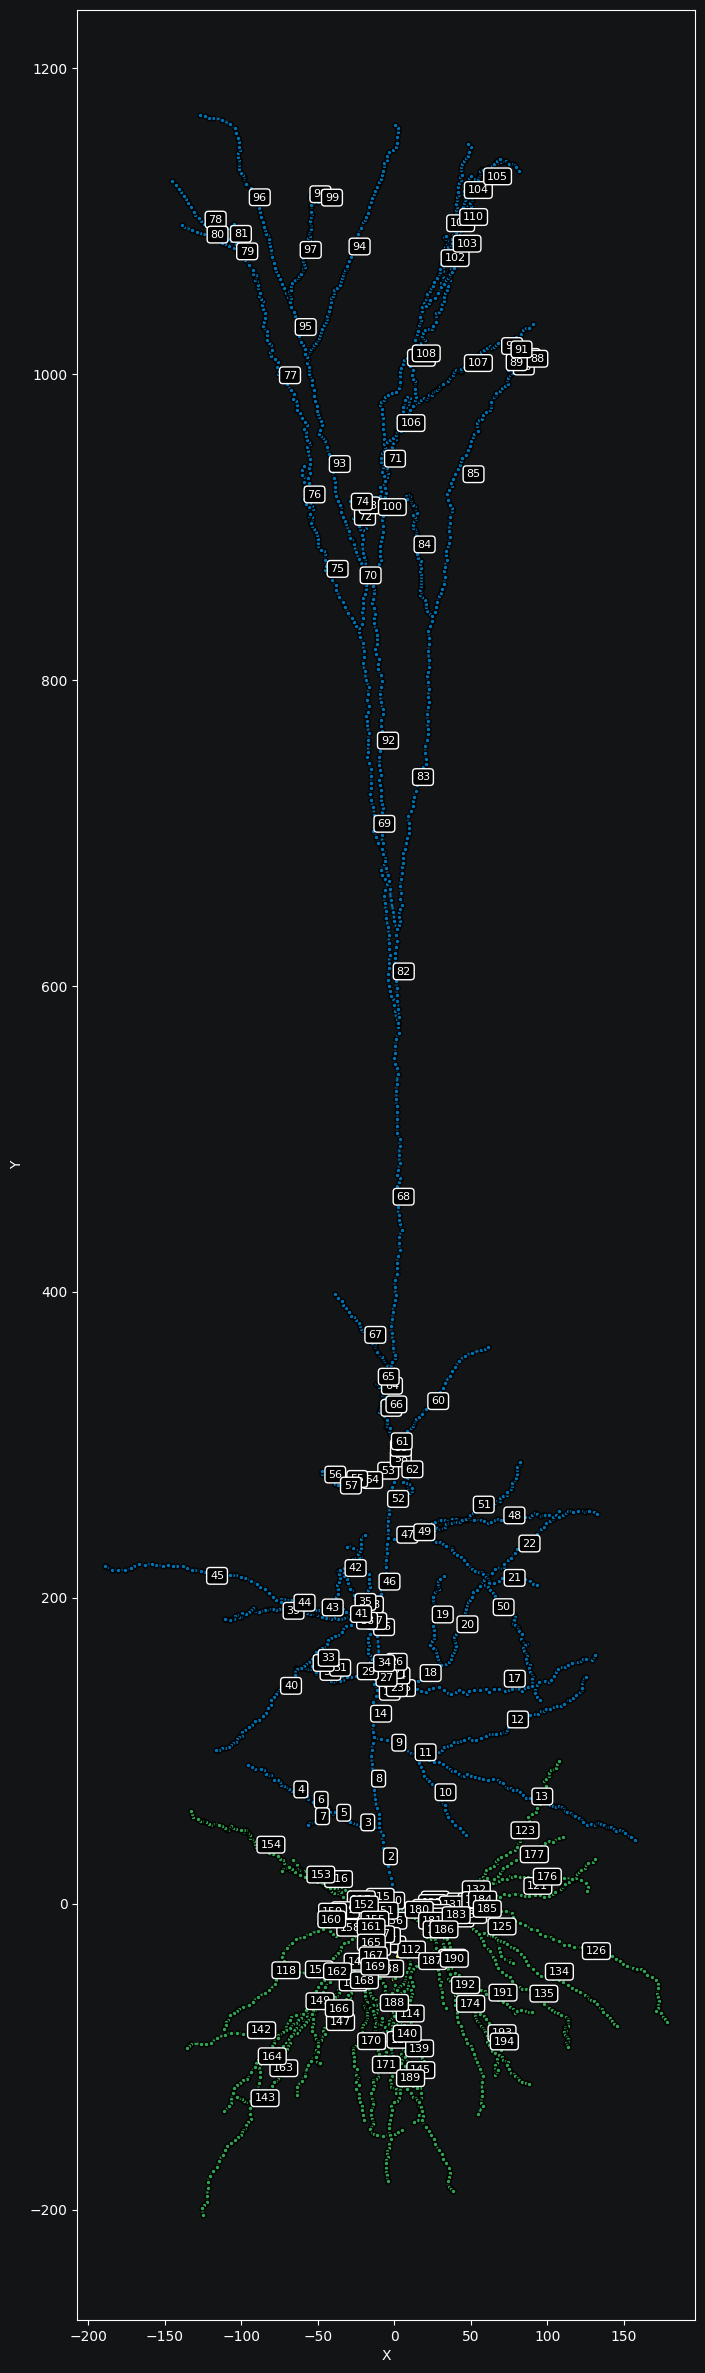

In [8]:
fig, ax = plt.subplots(figsize=(30, 30))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

# Mechanisms

In [9]:
model.list_biophys()

['Hay_2011_full']

In [10]:
model.load_biophys('Hay_2011_full')

Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaHVA.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/K_Pst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Im.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SK_E2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/SKv3_1.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/CaLVAst.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Nap_Et2.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples/Hay_2011/biophys/python/Ih.py
Saved content to /home/roman/Documents/code/DendroTweaksLab/DendroTweaks/examples

In [11]:
model.params

{'cm': {'all': constant({'value': 1}),
  'basal': constant({'value': 2}),
  'apical': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'axonal': constant({'value': 1})},
 'Ra': {'all': constant({'value': 100})},
 'gbar_Leak': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3.38e-05}),
  'axonal': constant({'value': 3.25e-05}),
  'basal': constant({'value': 4.67e-05}),
  'apical': constant({'value': 5.89e-05})},
 'e_Leak': {'all': constant({'value': -90})},
 'depth_CaDyn': {'all': constant({'value': 0.1})},
 'taur_CaDyn': {'all': constant({'value': 80}),
  'somatic': constant({'value': 460}),
  'apical': constant({'value': 122})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001})},
 'gamma_CaDyn': {'all': constant({'value': 0.05}),
  'somatic': constant({'value': 0.000501}),
  'apical': constant({'value': 0.000509})},
 'kt_CaDyn': {'all': constant({'value': 0})},
 'kd_CaDyn': {'all': constant({'value': 0})},
 'gbar_K_Tst': {'all': constant({'value': 0.0

## Reduce

In [12]:
root = model.sec_tree[2]
print(root.domain, root.parent.domain)

apic soma


<Axes: title={'center': 'Radius Distribution - Section 2 (apic)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

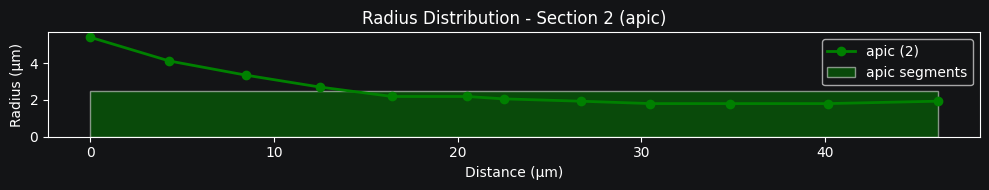

In [13]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [14]:
data = model.reduce_subtree(root, fit=True)

CableParams(length=2419.956820679183, diam=3.739652729314912, space_const=1259.8765552006237, cm=2.0, rm=16977.92869269949, ra=100.0, e_pas=-90.0, electrotonic_length=1.9207888349774294)
Sorted SectionTree(root=NeuronSection(idx=0), num_nodes=190).
Sorted PointTree(root=Point(idx=0), num_nodes=4187).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=994).
Sorted PointTree(root=Point(idx=0), num_nodes=1752).
Sorted SegmentTree(root=NeuronSegment(idx=0), num_nodes=475).
Sorted PointTree(root=Point(idx=0), num_nodes=1742).
Interpolated for ids []


Using the last valid fit (degree=10). Maximum residual: 0.0002336595875694002
(model.py, line 1563)
Using the last valid fit (degree=10). Maximum residual: 0.008660140028684742
(model.py, line 1563)
Using the last valid fit (degree=10). Maximum residual: 0.0013496128245511765
(model.py, line 1563)
(model.py, line 790)
(model.py, line 815)


In [15]:
# # Fit distributions to data for the group
# group_name = 'apical'
# segments = model.get_segments(group_names=[group_name])
# for param_name in model.params:
#     model.fit_distribution(param_name, segments=segments, plot=True)

In [15]:
model.params

{'cm': {'all': constant({'value': 1}),
  'basal': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'axonal': constant({'value': 1}),
  'reduced_0': constant({'value': 2.0})},
 'Ra': {'all': constant({'value': 100}),
  'reduced_0': constant({'value': 100.0})},
 'gbar_Leak': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3.38e-05}),
  'axonal': constant({'value': 3.25e-05}),
  'basal': constant({'value': 4.67e-05}),
  'reduced_0': constant({'value': 5.889999999999997e-05})},
 'e_Leak': {'all': constant({'value': -90}),
  'reduced_0': constant({'value': -90.0})},
 'depth_CaDyn': {'all': constant({'value': 0.1}),
  'reduced_0': constant({'value': 0.09999999999999998})},
 'taur_CaDyn': {'all': constant({'value': 80}),
  'somatic': constant({'value': 460}),
  'reduced_0': constant({'value': 122.0})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001}),
  'reduced_0': constant({'value': 9.999999999999998e-05})},
 'gamma_CaDyn': {'all': constant({'value': 0.05}

[]

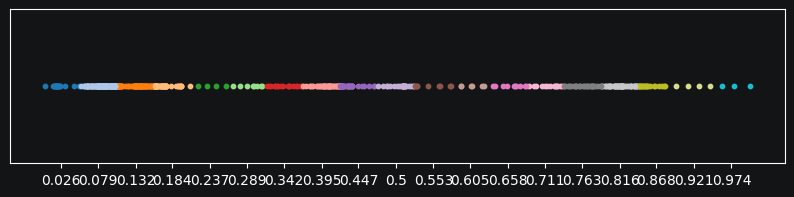

In [16]:
segs_to_reduced_segs = data['segs_to_reduced_segs']
segs_to_locs = data['segs_to_locs']
fig, ax = plt.subplots(figsize=(10, 2))

# Get the number of unique reduced segments
reduced_segs = root.segments
num_segs = len(reduced_segs)

# Create a color map with enough colors
if num_segs <= 10:
    colors = plt.cm.tab10.colors
elif num_segs <= 20:
    colors = plt.cm.tab20.colors
else:
    # For more than 20 segments, create a custom colormap with more colors
    cmap = plt.cm.viridis
    colors = [cmap(i/num_segs) for i in range(num_segs)]

# Map segments to colors
reduced_seg_to_color = {seg: colors[i % len(colors)] for i, seg in enumerate(reduced_segs)}

ax.set_ylim(-1, 1)
for seg, loc in segs_to_locs.items():
    plt.scatter(loc, [0], s=10, color=reduced_seg_to_color[segs_to_reduced_segs[seg]])

norm_centers = np.round(np.array(root.seg_centers)/root.L, 3)
ax.set_xticks(norm_centers)
ax.set_xticklabels(norm_centers)
ax.set_yticks([])

<Axes: title={'center': 'Radius Distribution - Section 86 (reduced_0)'}, xlabel='Distance (µm)', ylabel='Radius (µm)'>

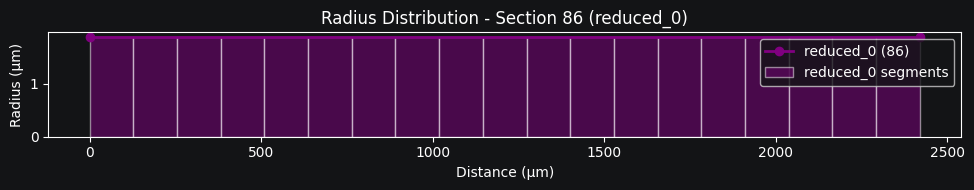

In [17]:
fig, ax = plt.subplots(figsize=(10, 2))
root.plot_radii(ax=ax)

In [18]:
model.params

{'cm': {'all': constant({'value': 1}),
  'basal': constant({'value': 2}),
  'somatic': constant({'value': 1}),
  'axonal': constant({'value': 1}),
  'reduced_0': constant({'value': 2.0})},
 'Ra': {'all': constant({'value': 100}),
  'reduced_0': constant({'value': 100.0})},
 'gbar_Leak': {'all': constant({'value': 0.0}),
  'somatic': constant({'value': 3.38e-05}),
  'axonal': constant({'value': 3.25e-05}),
  'basal': constant({'value': 4.67e-05}),
  'reduced_0': constant({'value': 5.889999999999997e-05})},
 'e_Leak': {'all': constant({'value': -90}),
  'reduced_0': constant({'value': -90.0})},
 'depth_CaDyn': {'all': constant({'value': 0.1}),
  'reduced_0': constant({'value': 0.09999999999999998})},
 'taur_CaDyn': {'all': constant({'value': 80}),
  'somatic': constant({'value': 460}),
  'reduced_0': constant({'value': 122.0})},
 'cainf_CaDyn': {'all': constant({'value': 0.0001}),
  'reduced_0': constant({'value': 9.999999999999998e-05})},
 'gamma_CaDyn': {'all': constant({'value': 0.05}

In [19]:
model.df_params

,Mechanism,Parameter,Group,Distribution,Distribution params
0,Independent,cm,all,constant,{'value': 1}
1,Independent,cm,basal,constant,{'value': 2}
2,Independent,cm,somatic,constant,{'value': 1}
3,Independent,cm,axonal,constant,{'value': 1}
4,Independent,cm,reduced_0,constant,{'value': 2.0}
...,...,...,...,...,...
59,CaHVA,gbar_CaHVA,reduced_0,polynomial,"{'coeffs': [1.0592141992215559e-60, -1.8825545..."
60,Ih,gbar_Ih,all,constant,{'value': 0.0}
61,Ih,gbar_Ih,somatic,constant,{'value': 0.0002}
62,Ih,gbar_Ih,basal,constant,{'value': 0.0002}


# Groups

In [20]:
model.domains_to_mechs

{'axon': {'Leak'},
 'soma': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'},
 'basal': {'Ih', 'Leak'},
 'reduced_0': {'CaDyn',
  'CaHVA',
  'CaLVAst',
  'Ih',
  'Im',
  'K_Pst',
  'K_Tst',
  'Leak',
  'NaTa_t',
  'Nap_Et2',
  'SK_E2',
  'SKv3_1'}}

In [21]:
model.groups

{'all': SegmentGroup("all", domains=['axon', 'soma', 'basal', 'reduced_0']),
 'axonal': SegmentGroup("axonal", domains=['axon']),
 'somatic': SegmentGroup("somatic", domains=['soma']),
 'basal': SegmentGroup("basal", domains=['basal']),
 'reduced_0': SegmentGroup("reduced_0", domains=['reduced_0'])}

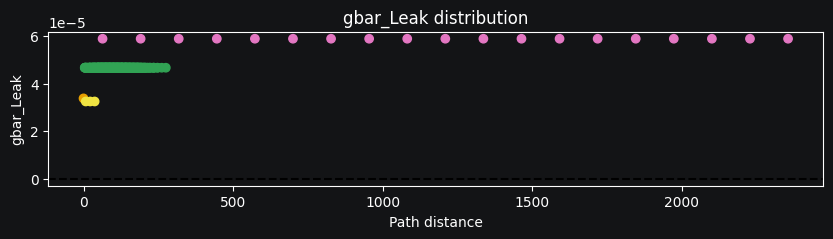

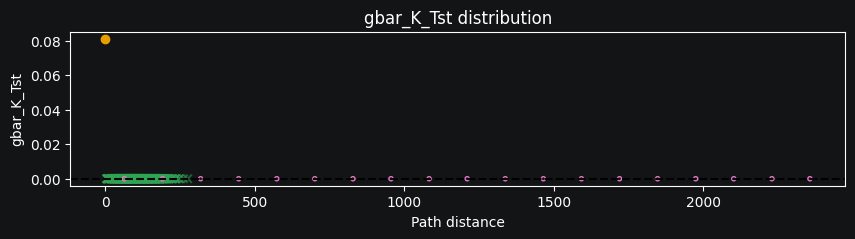

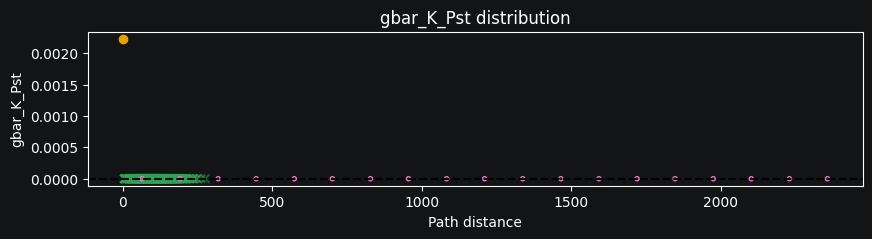

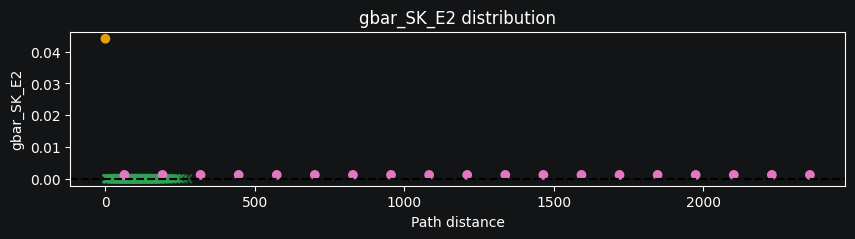

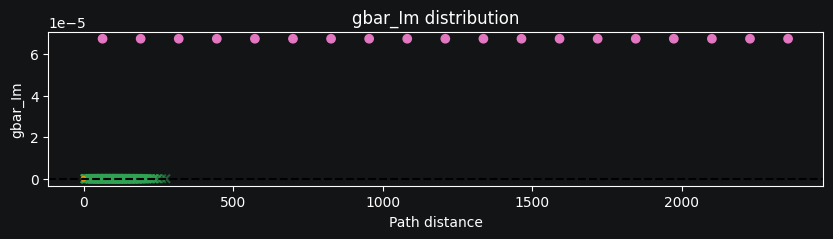

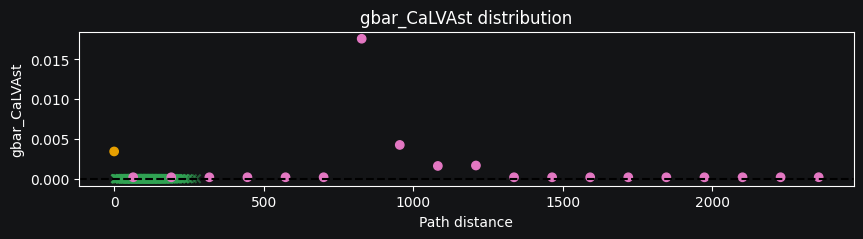

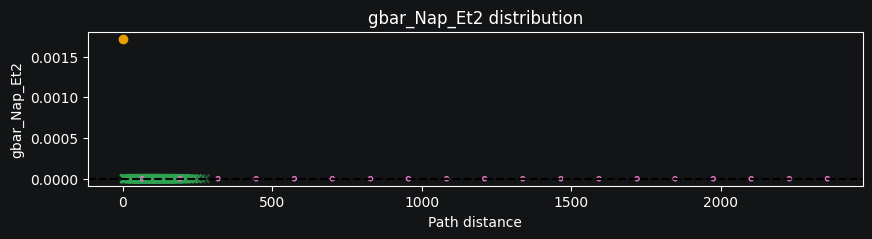

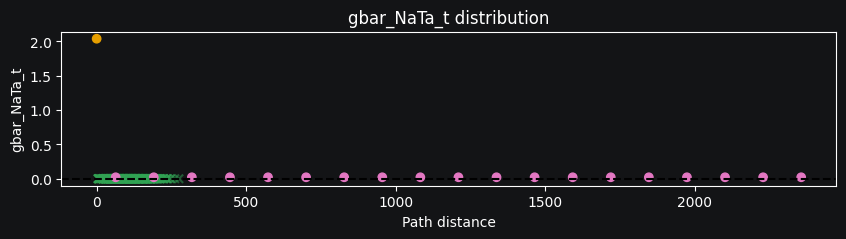

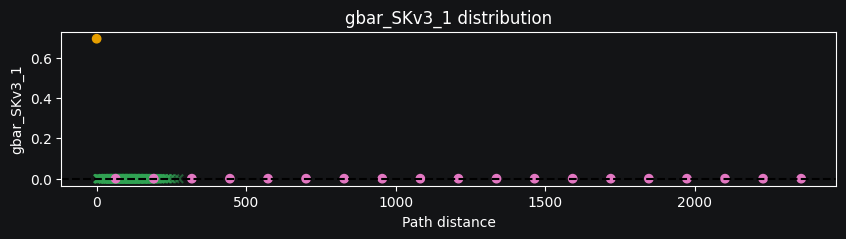

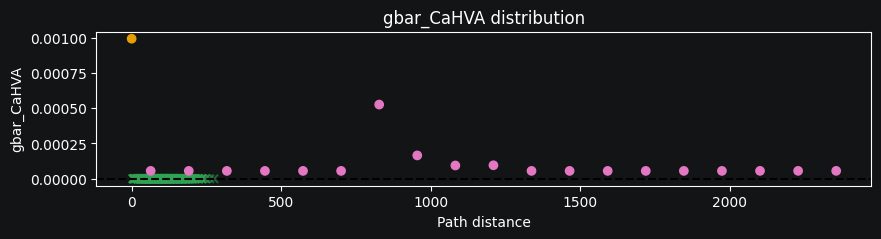

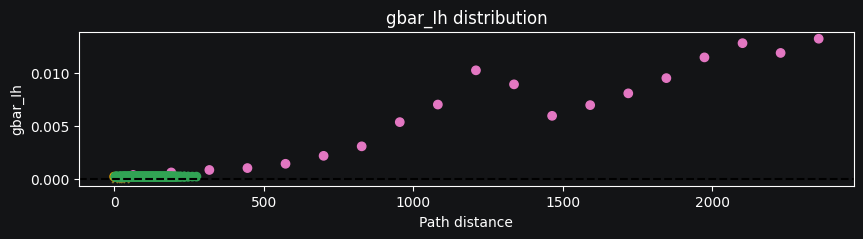

In [22]:
for param_name in model.conductances:
    fig, ax = plt.subplots(figsize=(10, 2))
    model.plot_param(param_name, ax=ax)

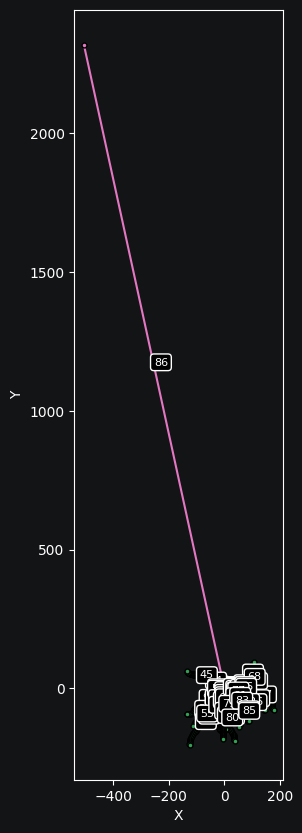

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
model.sec_tree.plot(ax, 
                    show_points=True,
                    show_lines=True,
                    annotate=True)

In [24]:
model.list_stimuli()

['depolarizing_current']

In [25]:
soma = model.sec_tree.soma
model.load_stimuli('depolarizing_current')

IClamp added to sec NeuronSection(idx=0) at loc 0.5.
Recording added to sec NeuronSection(idx=0) at loc 0.5.


In [26]:
model.iclamps[soma(0.5)].amp= 0.793

In [27]:
model.run(1000)

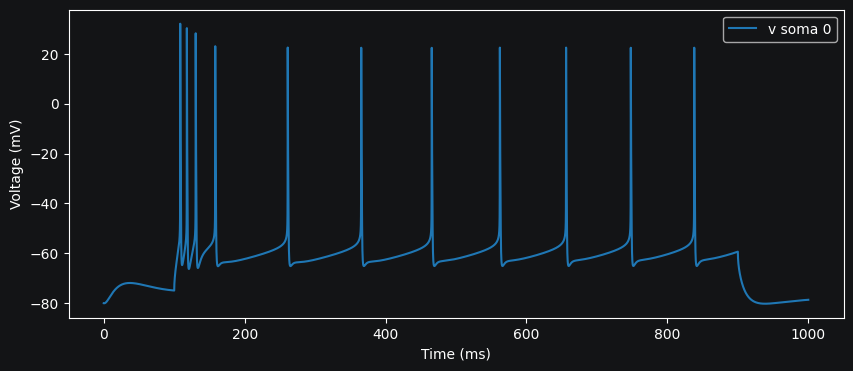

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
model.simulator.plot_voltage(ax=ax)

# Example

In [29]:
xs = [seg.path_distance() for seg in root.segments]
ys = [seg.get_param_value('gbar_CaHVA') for seg in root.segments]

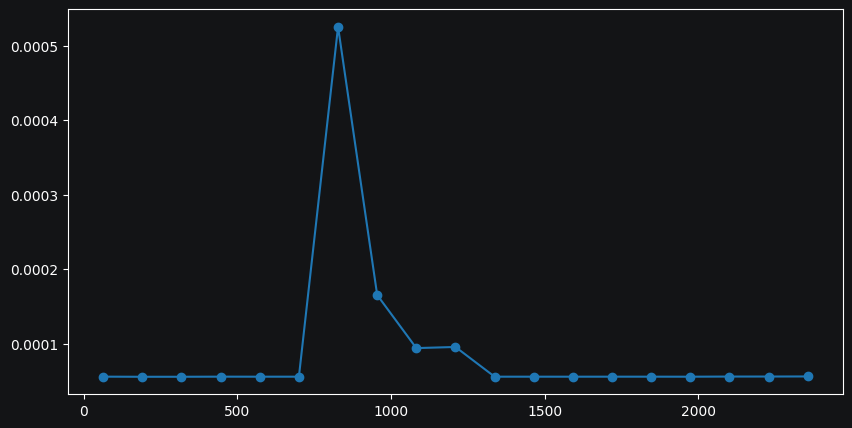

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(xs, ys, 'o-')

(241588884.py, line 6)
(241588884.py, line 6)


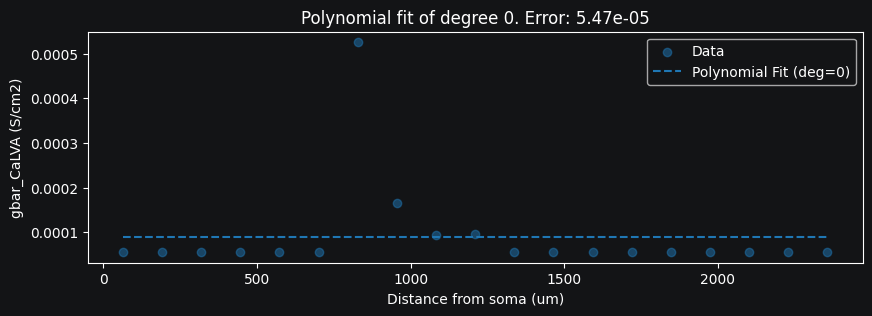

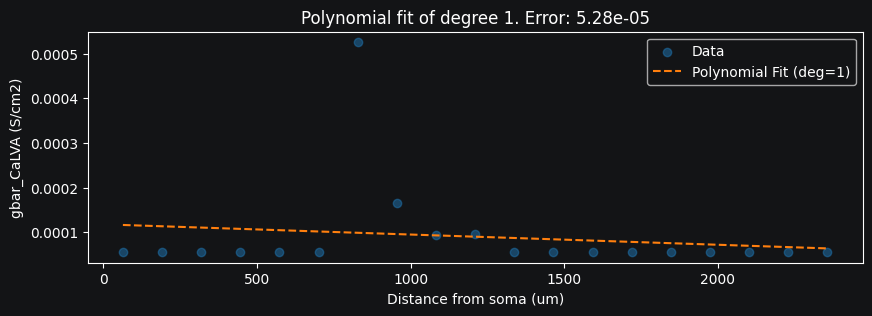

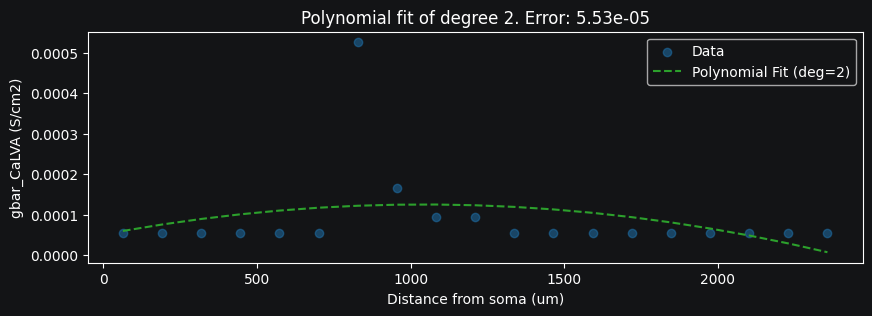

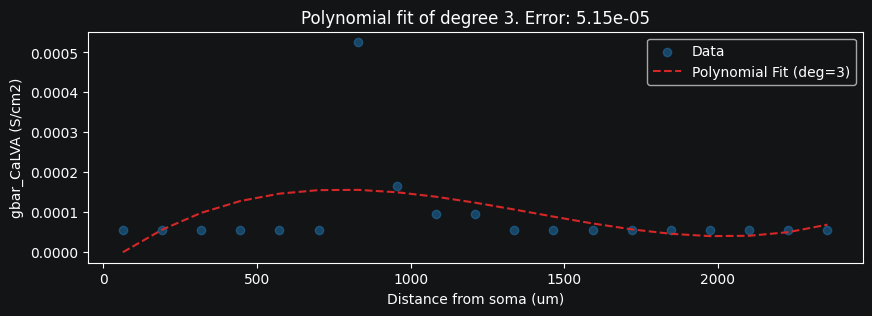

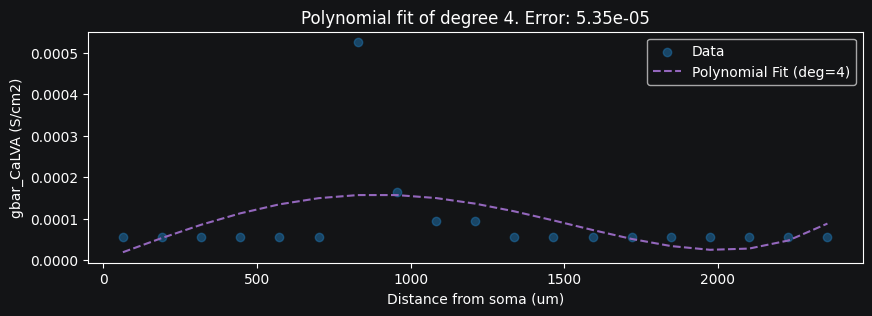

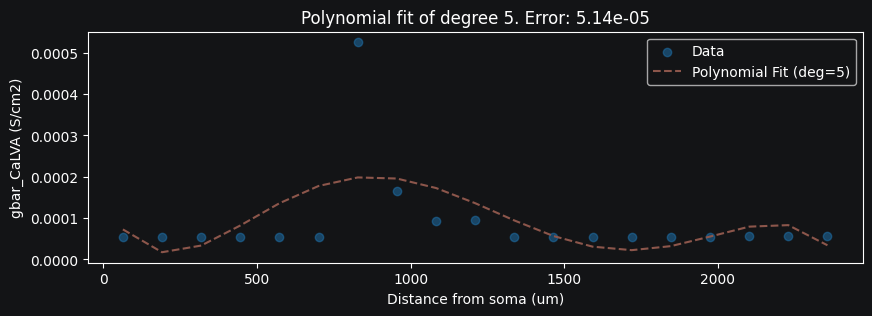

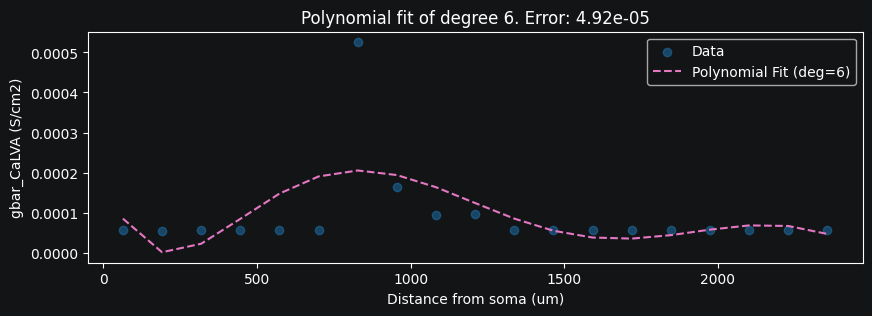

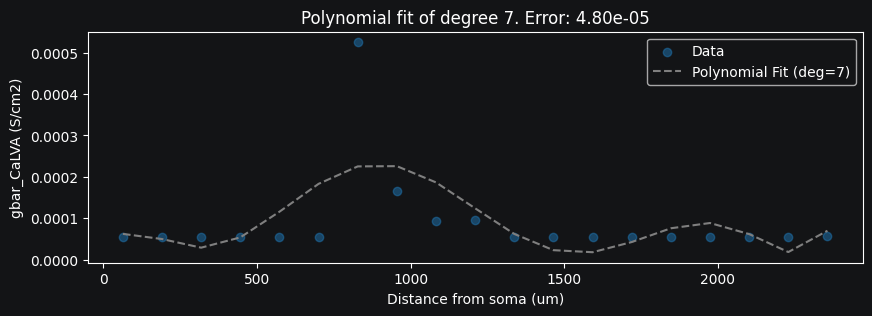

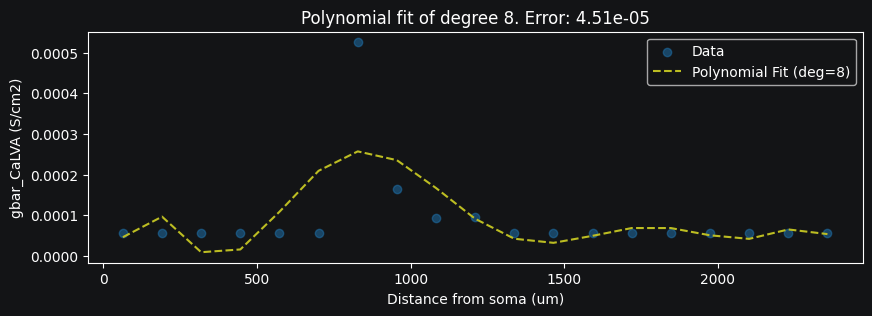

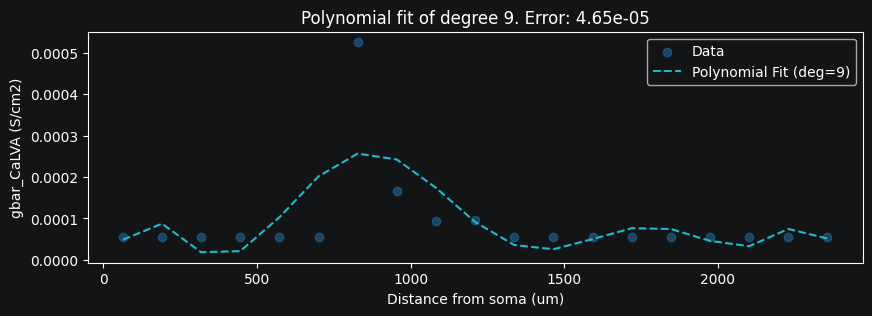

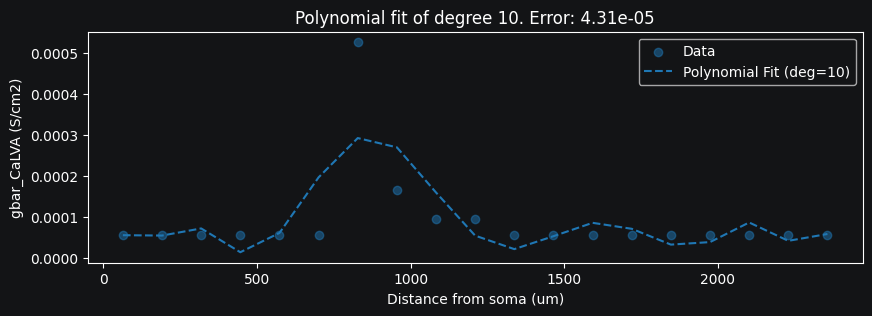

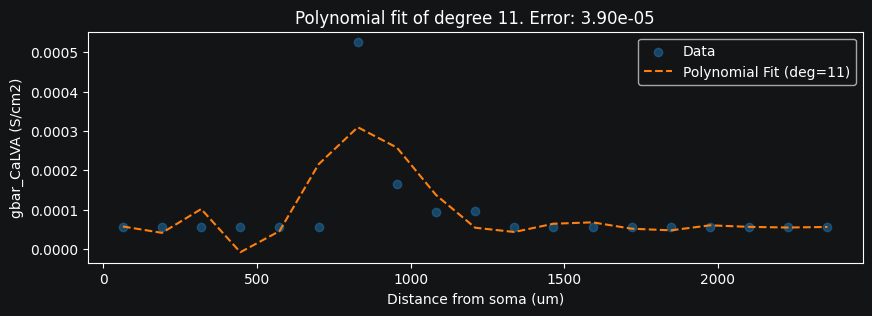

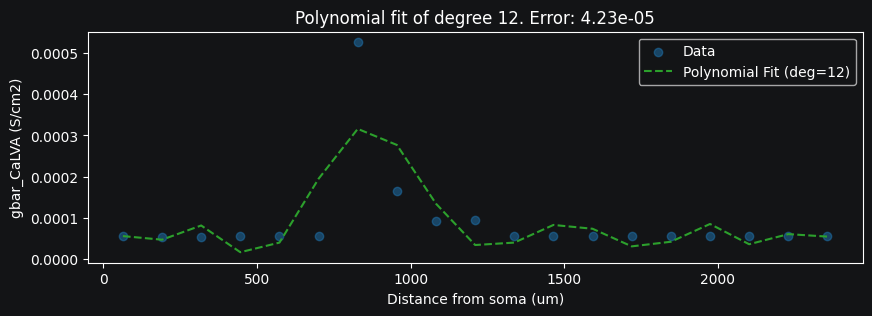

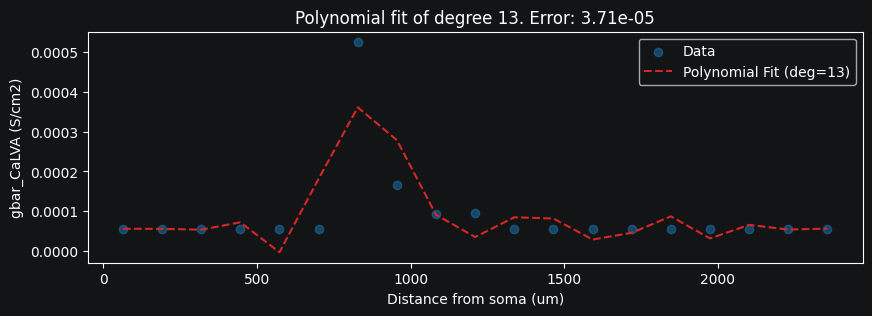

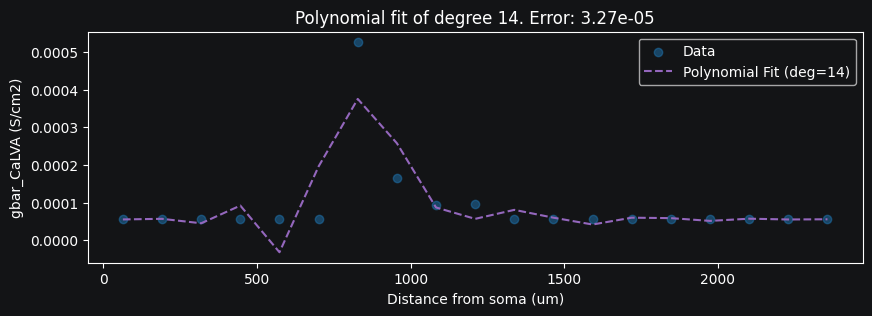

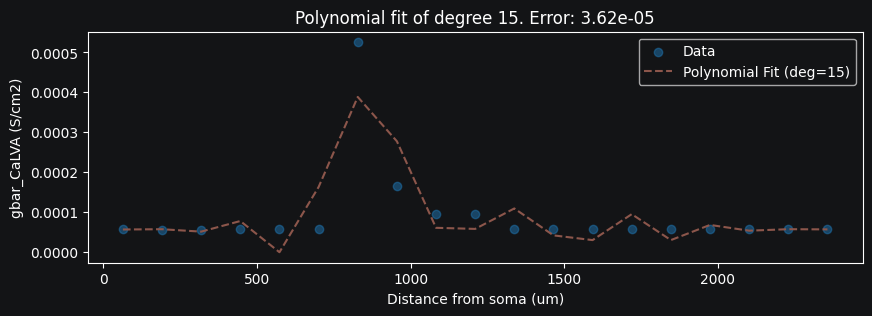

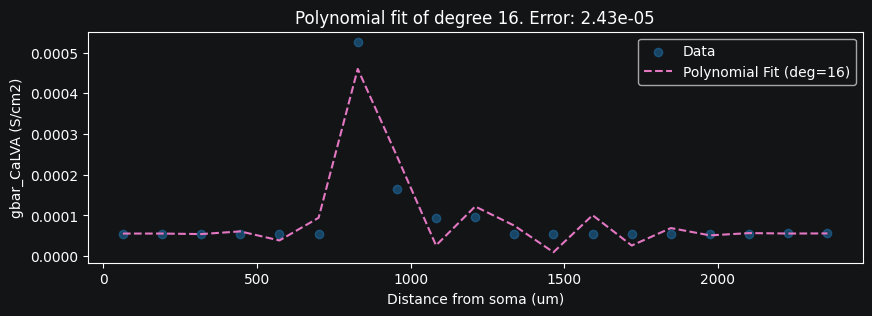

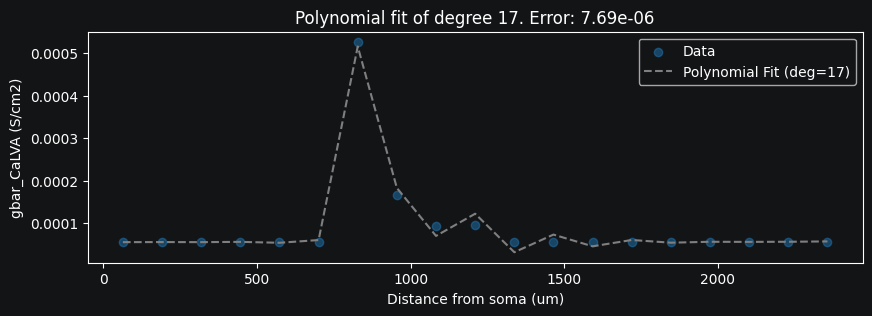

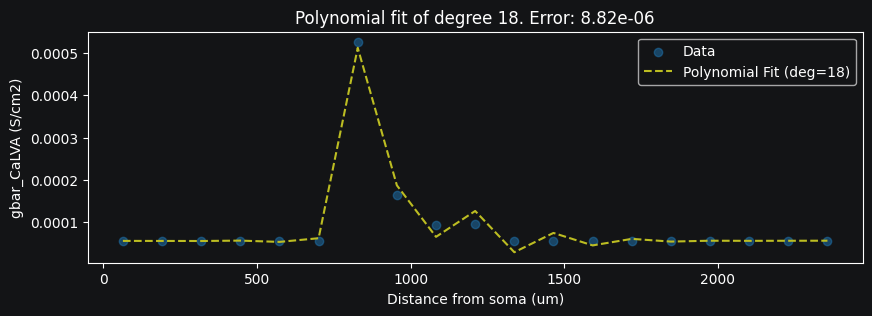

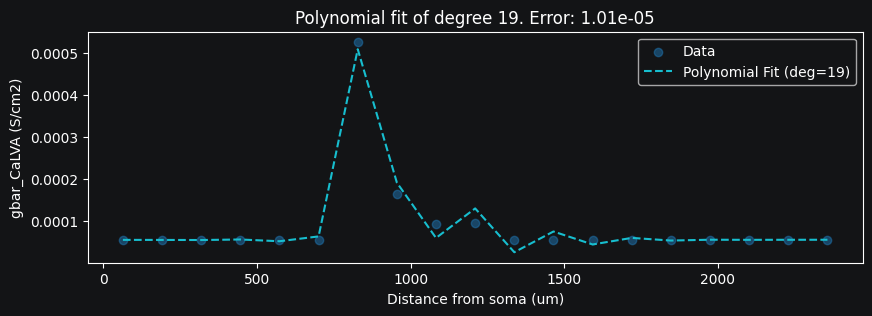

In [31]:
# Fit polynomials of degrees 0 through 12
degrees = np.arange(0, 20)
errors = []
fits = []
for degree in degrees:
    coeffs = np.polyfit(xs, ys, degree)
    ys_fit = np.polyval(coeffs, xs)
    error = np.mean(np.abs(ys - ys_fit))
    errors.append(error)
    fits.append(ys_fit)

# Plot each polynomial fit
for i, degree in enumerate(degrees):
    plt.figure(figsize=(10, 3))
    plt.scatter(xs, ys, label="Data", alpha=0.5)
    plt.plot(xs, fits[i], label=f"Polynomial Fit (deg={degree})", color=plt.cm.tab10.colors[i % 10], linestyle='--')
    plt.legend()
    plt.title(f"Polynomial fit of degree {degree}. Error: {errors[i]:.2e}")
    plt.xlabel("Distance from soma (um)")
    plt.ylabel("gbar_CaLVA (S/cm2)")

